## Cluster Visualization & Business Insights
This notebook visualizes the customer clusters and interprets them for business recommendations.

In [80]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("customer_segments.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [81]:
df["Cluster"].value_counts()

Cluster
0    65
2    57
1    40
3    38
Name: count, dtype: int64

In [82]:
df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,53.984615,47.707692,39.969231
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,39.368421,86.500000,19.578947


C:\Users\91766\AppData\Local\Temp\ipykernel_23036\3776854658.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Cluster", data=df, palette="Set2")


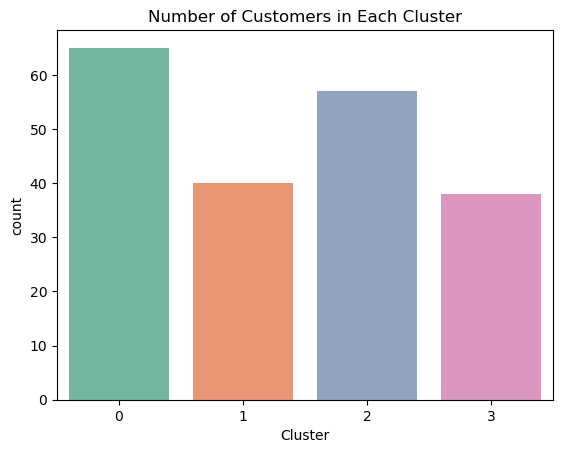

In [83]:
sns.countplot(x="Cluster", data=df, palette="Set2")
plt.title("Number of Customers in Each Cluster")
plt.show()

C:\Users\91766\AppData\Local\Temp\ipykernel_23036\3315005325.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df, palette="Set2")


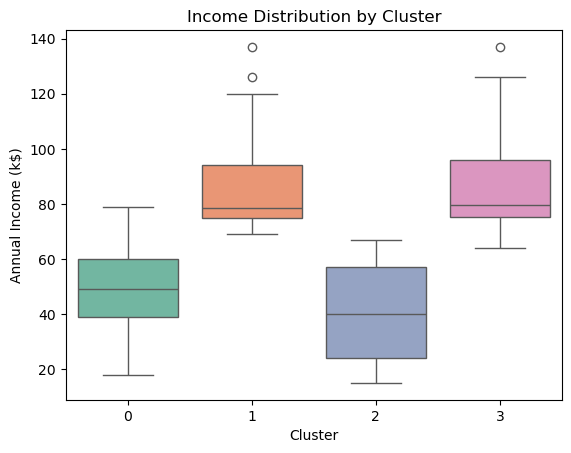

In [84]:
sns.boxplot(x="Cluster", y="Annual Income (k$)", data=df, palette="Set2")
plt.title("Income Distribution by Cluster")
plt.show()

C:\Users\91766\AppData\Local\Temp\ipykernel_23036\1828205797.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Spending Score (1-100)", data=df, palette="Set2")


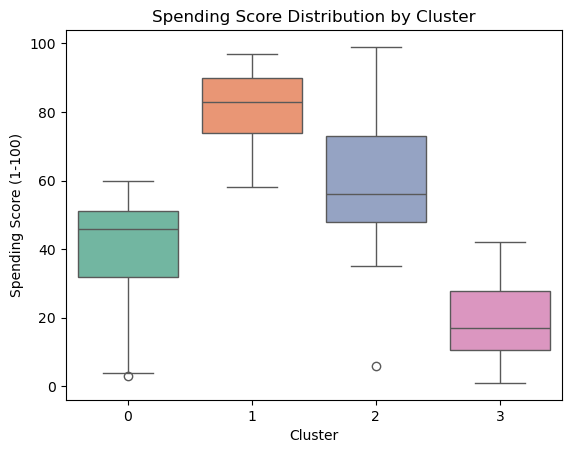

In [85]:
sns.boxplot(x="Cluster", y="Spending Score (1-100)", data=df, palette="Set2")
plt.title("Spending Score Distribution by Cluster")
plt.show()

## INSIGHTS:

Cluster 0 – Mature & Moderate Spenders
Older customers (≈54 yrs) with moderate income (≈48k) who spend carefully. Best for value-based products.

Cluster 1 – Young High-Income Big Spenders
Young adults (≈33 yrs), high income (≈86k), and very high spenders. Most profitable group for luxury/premium marketing.

Cluster 2 – Young Low-Income Average Spenders
Youngest group (≈25 yrs), low income (≈40k), but moderate spending habits. Good target for discounts and trendy affordable products.

Cluster 3 – Mid-Age High-Income Low Spenders
Mid-aged (≈39 yrs), high income (≈87k), but very low spending. Need personalized engagement to increase spending.

Business Takeaways:

Cluster 0 (Mature Moderate Spenders) → Good for value-based marketing.

Cluster 1 (Young High-Income Big Spenders) → Best group for luxury & premium targeting.

Cluster 2 (Young Average Spenders) → Can be converted into loyal customers with budget-friendly deals.

Cluster 3 (High-Income Low Spenders) → Requires strategic engagement to encourage higher spending.

In [87]:
profile = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
profile.to_csv("cluster_profiles.csv")

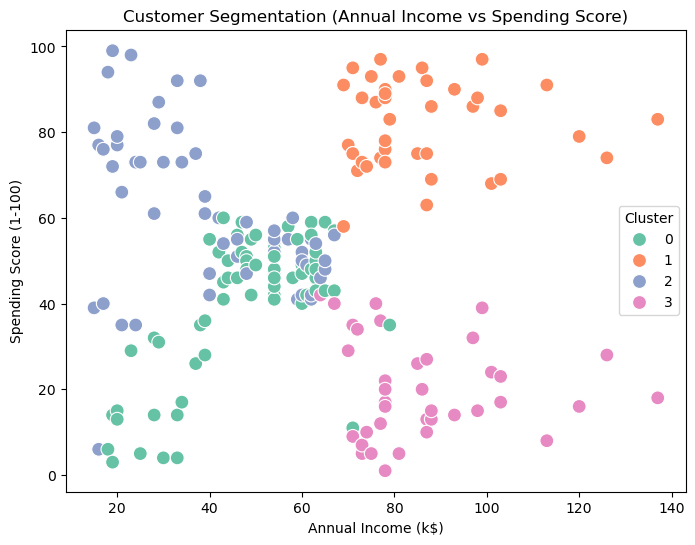

In [88]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, 
    x="Annual Income (k$)", 
    y="Spending Score (1-100)", 
    hue="Cluster", 
    palette="Set2", 
    s=100
)
plt.title("Customer Segmentation (Annual Income vs Spending Score)")
plt.show()

### Insights from Scatter Plot

The scatter plot shows clear segmentation of customers:
- **Cluster 0**: Middle-income, low spending group. Likely practical and conservative buyers.  
- **Cluster 1**: High-income, high spending group. Represents premium/luxury customers.  
- **Cluster 2**: Low-income, high spending group. Possibly young or impulsive spenders.  
- **Cluster 3**: High-income, low spending group. Potentially professionals or savers.  

This confirms that the segmentation algorithm has successfully grouped customers into distinct behavioral clusters.

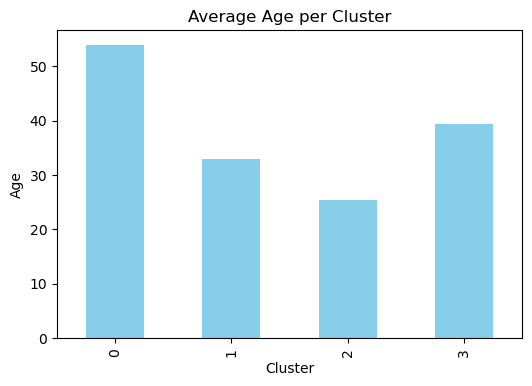

In [90]:
df.groupby("Cluster")["Age"].mean().plot(
    kind="bar", color="skyblue", figsize=(6,4)
)
plt.title("Average Age per Cluster")
plt.ylabel("Age")
plt.show()

### Insights from Average Age by Cluster

- **Cluster 0** customers are older (avg ~54 years), more conservative with spending.  
- **Cluster 1** customers are younger (avg ~33 years) and are luxury buyers.  
- **Cluster 2** customers are the youngest (avg ~25 years), spend more despite lower income.  
- **Cluster 3** customers are mid-aged (~39 years) but show cautious spending behavior.  

Age seems to play a strong role in spending patterns.

C:\Users\91766\AppData\Local\Temp\ipykernel_23036\3162344130.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Cluster", y="Annual Income (k$)", palette="Set3")


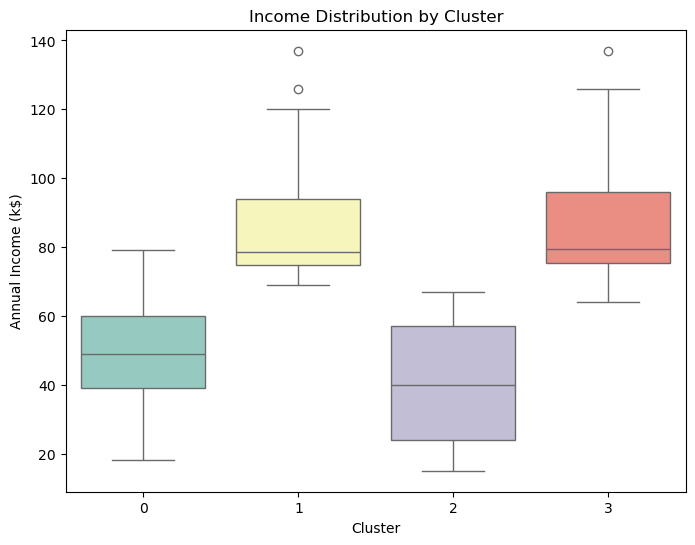

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Cluster", y="Annual Income (k$)", palette="Set3")
plt.title("Income Distribution by Cluster")
plt.show()

### Insights from Income Distribution by Cluster

- **Cluster 1 and 3**: Both have high income, but Cluster 1 spends more while Cluster 3 spends less.  
- **Cluster 0**: Moderate income range, consistent spending behavior.  
- **Cluster 2**: Low income but high variability in spending habits.  

This highlights the contrast between income and actual spending behavior.

In [94]:
plt.savefig("cluster_visualization.png")
plt.show()

<Figure size 640x480 with 0 Axes>